In [1]:
#!/usr/bin/env python
# coding: utf-8

import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math


##############################################################################################################
######################### define constant

"""Note!
the point (0, 0, 0) is the center of target slot, and it is also the origin for the plotted graph
"""

# graph center point, also target slot center point
target_slot_center_x = 0.0
target_slot_center_y = 0.0
target_slot_center_theta = 0.0

# param. for slot and lane width, iso standard
slot_border_long = 6
slot_border_short = 2.5
slot_lane_width = 4.5

# param. for target and side slot points. t-target, s-side; x, y, pt_a as reference. 
# manually setup slot point abcd
# pt_a_t = [-3, -1.25]
# pt_b_t = [3, -1.25]
# pt_c_t = [3, 1.25]
# pt_d_t = [-3, 1.25]
# pt_a_s = [3, -1.25]
# pt_b_s = [9, -1.25]
# pt_c_s = [9, 1.25]
# pt_d_s = [3, 1.25]

# set only point a, up right plus, down left minus 
# pt_a_t = [-3, -1.25]  # x, y
pt_a_t = [target_slot_center_x - slot_border_long / 2, target_slot_center_y - slot_border_short / 2]
print ("pt_a_t: ", pt_a_t)
pt_b_t = [pt_a_t[0] + slot_border_long, pt_a_t[1]]
pt_c_t = [pt_a_t[0] + slot_border_long, pt_a_t[1] + slot_border_short]
pt_d_t = [pt_a_t[0], pt_a_t[1] + slot_border_short]
pt_a_s = [pt_a_t[0] + slot_border_long, pt_a_t[1]]  # pt_a_s is pt_b_t
pt_b_s = [pt_a_s[0] + slot_border_long, pt_a_s[1]]
pt_c_s = [pt_a_s[0] + slot_border_long, pt_a_s[1] + slot_border_short]
pt_d_s = [pt_a_s[0], pt_a_s[1] + slot_border_short]

pt_target = [target_slot_center_x, target_slot_center_y, target_slot_center_theta]

# slot_point_1_x = [3, 3, -3, -3]
# slot_point_1_y = [-1.25, 1.25, 1.25, -1.25]
# slot_point_2_x = [9, 9, 3, 3]
# slot_point_2_y = [-1.25, 1.25, 1.25, -1.25]

slot_pt_abcd_target = [pt_a_t, pt_b_t, pt_c_t, pt_d_t]  # [[x, y], ..]: ABCD
slot_pt_abcd_side = [pt_a_s, pt_b_s, pt_c_s, pt_d_s]

# param. for car dimension
g_REAR_WHEEL_AXIS = 0.94
g_FRONT_WHEEL_AXIS = 0.926
g_FRONT_REAR_WHEEL_LEN = 2.92

PARKING_OFFSET = 1.2  # setup for perpend. parking
HORIZONTAL_PARKING_OFFSET = 0

##############################################################################################################
######################### calcualte target_pose

car_len = g_REAR_WHEEL_AXIS + g_FRONT_WHEEL_AXIS + g_FRONT_REAR_WHEEL_LEN
PARKING_OFFSET = -1 * (car_len/2 - g_REAR_WHEEL_AXIS)

""" bool APA_ParkSpaceGridmap::GetTargetPoseParam()

# formula for slot_center_point and parking_target_point

PRINT_LOG("GetTargetPoseParam: getting parallel parking goal");
cv::Point2f ptAD = (ptA + ptD) / 2;
cv::Point2f ptBC = (ptB + ptC) / 2;
cv::Point2f ptCenter = (ptAD + ptBC) / 2;

double dx = double(ptBC.x - ptAD.x);
double dy = double(ptBC.y - ptAD.y);
ang_rad = atan2(dy, dx);
ang = float(RADIANS_TO_DEGREES(ang_rad));

left parallel parking
x = ptCenter.x + PARKING_OFFSET * cos(ang_rad) + HORIZONTAL_PARKING_OFFSET * sin(ang_rad);
y = ptCenter.y + PARKING_OFFSET * sin(ang_rad) - HORIZONTAL_PARKING_OFFSET * cos(ang_rad);

pt_bc = [0, 0]  # x, y 
pt_ad = [0, 0]

"""

pt_bc = [(pt_b_t[0] + pt_c_t[0]) / 2, (pt_b_t[1] + pt_c_t[1]) / 2]  # x, y
pt_ad = [(pt_a_t[0] + pt_d_t[0]) / 2, (pt_a_t[1] + pt_d_t[1]) / 2]
pt_center = [(pt_ad[0] + pt_bc[0]) / 2, (pt_ad[1] + pt_bc[1]) / 2]

dx = pt_bc[0] - pt_ad[0]
dy = pt_bc[1] - pt_ad[1]
print("dx: {}, dy: {}".format(dx, dy))

ang_rad = math.atan2(dy, dx)
ang = math.degrees(ang_rad)

# left parallel parking
x = pt_center[0] + PARKING_OFFSET * math.cos(ang_rad) + HORIZONTAL_PARKING_OFFSET * math.sin(ang_rad)
y = pt_center[1] + PARKING_OFFSET * math.sin(ang_rad) - HORIZONTAL_PARKING_OFFSET * math.cos(ang_rad)
pt_target.clear()
pt_target.append(x)
pt_target.append(y)
pt_target.append(ang_rad)


# display basic info. 
print("1. car_len: ",car_len)
print("2. slot_lane_width: ", slot_lane_width)
print("3. slot length ideal: ", 1.5 * car_len)
print("4. PARKING_OFFSET: ", PARKING_OFFSET)
print("5. ang_rad: {}, ang: {}".format(ang_rad, ang))
print("6. pt_bc: ", pt_bc)
print("7. pt_ad: ", pt_ad)
print("8. pt_center: ", pt_center)
print("9. pt_target: ", pt_target)

pt_a_t:  [-3.0, -1.25]
dx: 6.0, dy: 0.0
1. car_len:  4.786
2. slot_lane_width:  4.5
3. slot length ideal:  7.178999999999999
4. PARKING_OFFSET:  -1.4529999999999998
5. ang_rad: 0.0, ang: 0.0
6. pt_bc:  [3.0, 0.0]
7. pt_ad:  [-3.0, 0.0]
8. pt_center:  [0.0, 0.0]
9. pt_target:  [-1.4529999999999998, 0.0, 0.0]


1. pt_target:  [-1.4529999999999998, 0.0, 0.0]


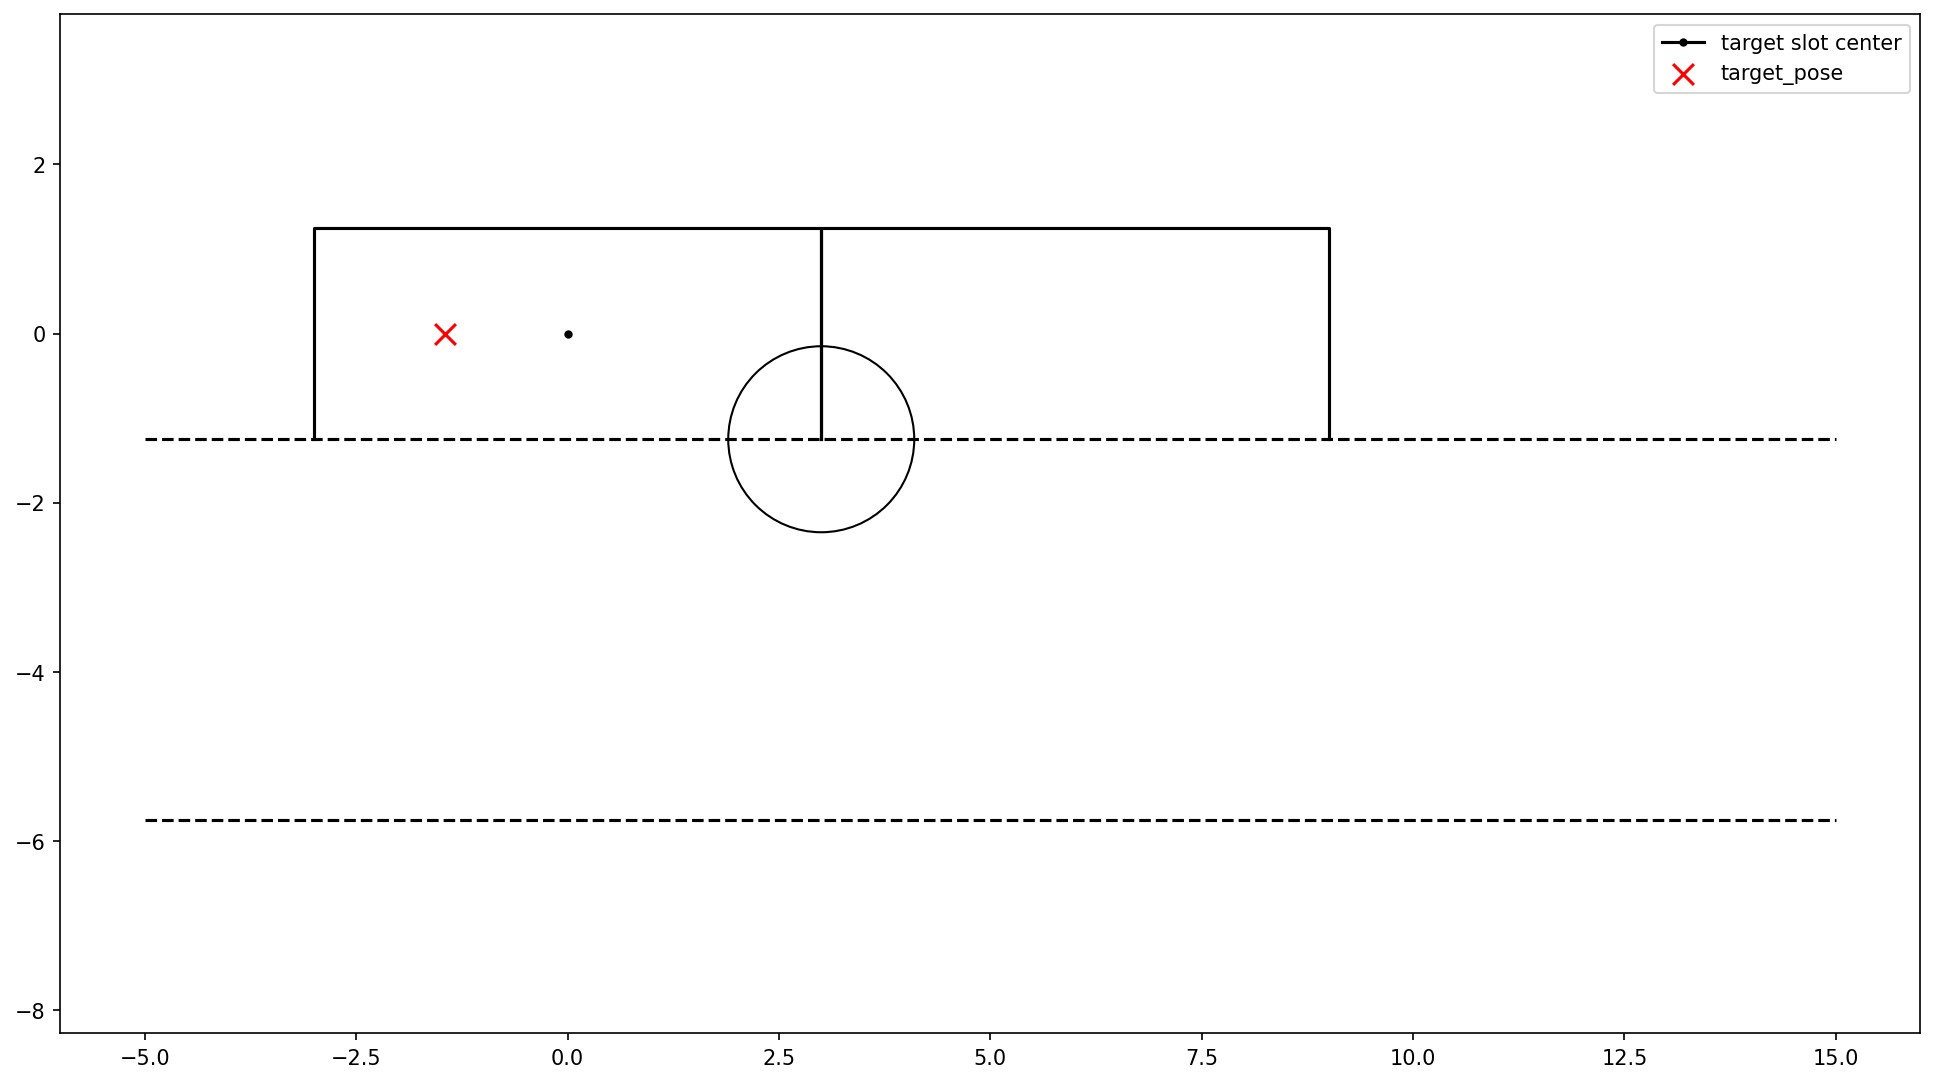

In [2]:

##############################################################################################################
######################### plot env. objects

plt.figure(figsize=(16,9), dpi=150) # parallel
# plt.figure(figsize=(10,10), dpi=150) # perpendicular

plt.axis("equal")

# 0. plot graph frame center, also target slot center
graph_center_x = [0]
graph_center_y = [0]
plt.plot(graph_center_x, graph_center_y, marker=".", color="black", label="target slot center")


# 1. plot pt_target (target pose)
parking_target_x = [pt_target[0]]
parking_target_y = [pt_target[1]]
plt.scatter(parking_target_x, parking_target_y, marker='x', color='r', label="target_pose", s=100)
print("1. pt_target: ", pt_target)


# 7. plot parking slot
slot_point_1_x = [slot_pt_abcd_target[1][0], slot_pt_abcd_target[2][0], slot_pt_abcd_target[3][0], slot_pt_abcd_target[0][0]]
slot_point_1_y = [slot_pt_abcd_target[1][1], slot_pt_abcd_target[2][1], slot_pt_abcd_target[3][1], slot_pt_abcd_target[0][1]]
slot_point_2_x = [slot_pt_abcd_side[1][0], slot_pt_abcd_side[2][0], slot_pt_abcd_side[3][0], slot_pt_abcd_side[0][0]]
slot_point_2_y = [slot_pt_abcd_side[1][1], slot_pt_abcd_side[2][1], slot_pt_abcd_side[3][1], slot_pt_abcd_side[0][1]]
plt.plot(slot_point_1_x, slot_point_1_y, color="k")
plt.plot(slot_point_2_x, slot_point_2_y, color="k")


# 8. plot auxilary circle
circle_1 = plt.Circle((slot_point_1_x[0], slot_point_2_y[0]), 1.1, fill=False)
plt.gca().add_patch(circle_1)


# 9. plot stopper
# stopper_1_x = [-2, -2]
# stopper_1_y = [-1.25, 1.25]
# stopper_2_x = [4, 4]
# stopper_2_y = [-1.25, 1.25]
# plt.plot(stopper_1_x, stopper_1_y, linestyle="dotted", color="k")
# plt.plot(stopper_2_x, stopper_2_y, linestyle="dotted", color="k")


# 10. plot cross_goal, deprecated
# cross_goal_1_x = [-1.4]
# cross_goal_1_y = [0]
# cross_goal_2_x = [4.6]
# cross_goal_2_y = [0]
# plt.scatter(cross_goal_1_x, cross_goal_1_y, label="cross_goal", marker='x', color='r', s=150)  # parking_target
# plt.scatter(cross_goal_2_x, cross_goal_2_y, label="cross_goal", marker='x', color='r', s=150)


# 11. plot lane 4 meters, lane_1 is on the slot, lane_2 is on opposite side.  
lane_1_x = [-5, 15]  # start, end, fixed
lane_1_y = [pt_a_t[1], pt_b_t[1]]  # same value as y coordinate as point a&b, ideal
lane_2_x = [-5, 15]  # start, end, fixed
lane_2_y = [lane_1_y[0] - slot_lane_width, lane_1_y[1] - slot_lane_width]
plt.plot(lane_1_x, lane_1_y, linestyle="dashed", color="k")
plt.plot(lane_2_x, lane_2_y, linestyle="dashed", color="k")


# # 12. ideal path start pose, this should be calculated. 
# path_start_ideal_x = [4.6]
# path_start_ideal_y = [-3.5]
# plt.scatter(path_start_ideal_x, path_start_ideal_y, label="path_start_ideal", marker='x', color='r', s=150)


# # 13. plot auxiliary start line, this should also be calculated 
# aux_start_lane_x = [-3, 9]
# aux_start_lane_y = [-3.5, -3.5]
# plt.plot(aux_start_lane_x, aux_start_lane_y, linestyle="dashed", color="k")



plt.legend(loc="best")

plt.show()